In [1]:
import tensorflow as tf
import numpy as np
import os
from performance_prediction_model import Model
from sklearn.externals import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import prediction

In [3]:
model = 'all'          # Model
folder = 'V100'   # Data folder
path = 'data/other'

In [4]:
# Select optimizer ('None', 'SGD', 'Adam', ...)
opt = 'None'

In [9]:
batchsize = 2**np.arange(0,6,1)
t = np.zeros([16,6])
for i in range(len(batchsize)):
    l, t[:,i] = prediction.predict_walltime('model_architecture/VGG16.json',
                                            'models/%s/saved_model' %model,
                                            'models/%s/scaler_Conv.save' %model, 
                                            batchsize[i],
                                            opt,
                                            900,     # memory bandwidth in GB/s
                                            5120,    # number of cuda cores
                                            1455)    # GPU clock in MHz

INFO:tensorflow:Restoring parameters from models/all/saved_model/variables/variables


/Users/djustus/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


INFO:tensorflow:Restoring parameters from models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from models/all/saved_model/variables/variables
INFO:tensorflow:Restoring parameters from models/all/saved_model/variables/variables


In [10]:
l_unique = l.copy()
duplicates = [12,11,9,6]
for d in duplicates:
    print(l_unique[d])
    l_unique.pop(d)
    
t_unique = np.delete(t,duplicates,0)

conv5_3
conv5_2
conv4_3
conv3_3


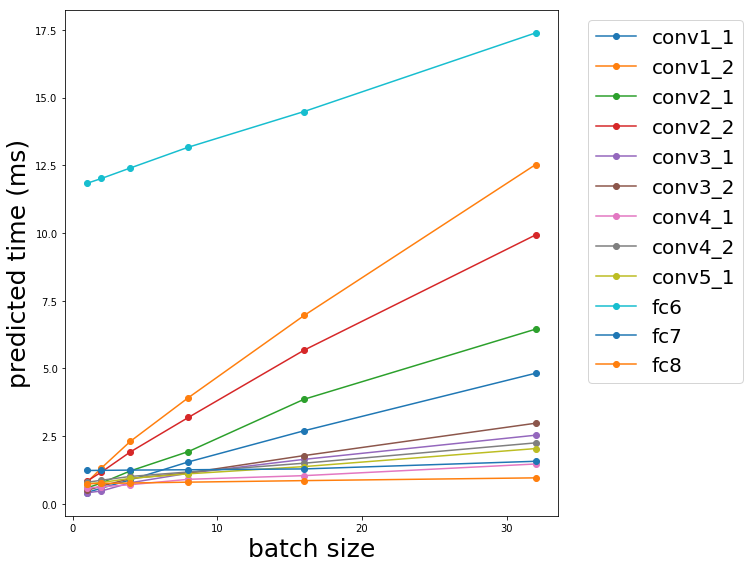

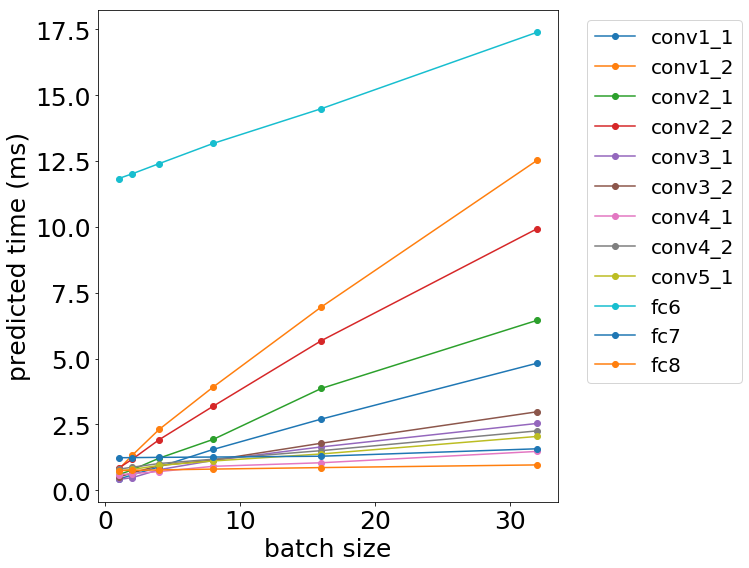

In [12]:
fig,ax = plt.subplots(1,1,figsize=[8,8])
plt.plot(batchsize,t_unique.transpose(),'o-')

ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.xaxis.set_minor_formatter(plt.NullFormatter())
ax.yaxis.set_minor_formatter(plt.NullFormatter())

matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 

plt.xlabel('batch size',fontsize=25)
plt.ylabel('predicted time (ms)',fontsize=25)

plt.legend(l_unique,bbox_to_anchor=(1.04,1), loc="upper left",fontsize=20)

plt.tight_layout()

plt.savefig('figures/VGG16_full_model_layers_%s_%s.png' %(model,opt), dpi=300)
plt.show()